In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [2]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
X

array([[-9.32386218e-02,  2.99041641e-01],
       [ 4.15898414e-01,  1.11023783e+00],
       [ 9.87505098e-02,  5.43766155e-02],
       [-3.18616104e-01, -4.98557102e-01],
       [-6.01736430e-01,  1.13675809e+00],
       [-9.36913945e-03, -1.40794778e-01],
       [ 5.63275761e-02,  3.92660379e-01],
       [-8.24184824e-01,  3.96353598e-01],
       [-3.71931480e-01,  6.86631947e-01],
       [-1.59861466e-01, -5.38689457e-01],
       [ 1.01313173e+00,  7.37618759e-02],
       [ 5.93211139e-01, -1.43861447e+00],
       [ 4.73069369e-01, -4.13685114e-01],
       [-9.47820332e-01,  5.68898692e-01],
       [ 5.83452928e-01, -3.99362660e-03],
       [ 9.05925986e-02, -9.64564692e-02],
       [ 6.76839485e-02, -1.89591342e-01],
       [ 7.46729013e-01,  8.57657068e-01],
       [ 5.78621809e-01, -5.56450745e-01],
       [ 4.96253827e-01,  1.11034838e-01],
       [-3.18586578e-02, -2.16572208e-01],
       [ 4.62739163e-01,  5.77154123e-02],
       [-4.64025929e-01,  1.95529072e-01],
       [ 3.

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
abc=AdaBoostClassifier()
np.mean(cross_val_score(abc,X,y,scoring="accuracy",cv=10))

0.786

In [5]:
abc.fit(X,y)

AdaBoostClassifier()

In [6]:
abc.score(X,y)

0.878

In [7]:
y_pred=abc.predict(X)

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
accuracy_score(y,y_pred)

0.878

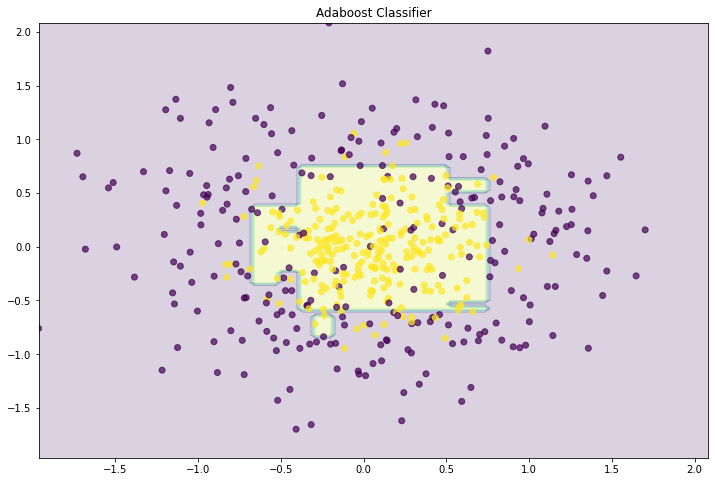

In [10]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()
    
plot_decision_boundary(abc)

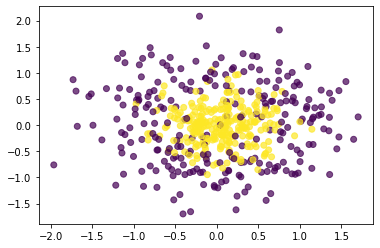

In [11]:
plt.scatter(X[:,0], X[:,1], c=y,cmap='viridis', alpha=.7)

In [12]:
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)

In [13]:
xx1

array([[-1.96330037, -1.92243666, -1.88157296, ...,  2.00047921,
         2.04134292,  2.08220663],
       [-1.96330037, -1.92243666, -1.88157296, ...,  2.00047921,
         2.04134292,  2.08220663],
       [-1.96330037, -1.92243666, -1.88157296, ...,  2.00047921,
         2.04134292,  2.08220663],
       ...,
       [-1.96330037, -1.92243666, -1.88157296, ...,  2.00047921,
         2.04134292,  2.08220663],
       [-1.96330037, -1.92243666, -1.88157296, ...,  2.00047921,
         2.04134292,  2.08220663],
       [-1.96330037, -1.92243666, -1.88157296, ...,  2.00047921,
         2.04134292,  2.08220663]])

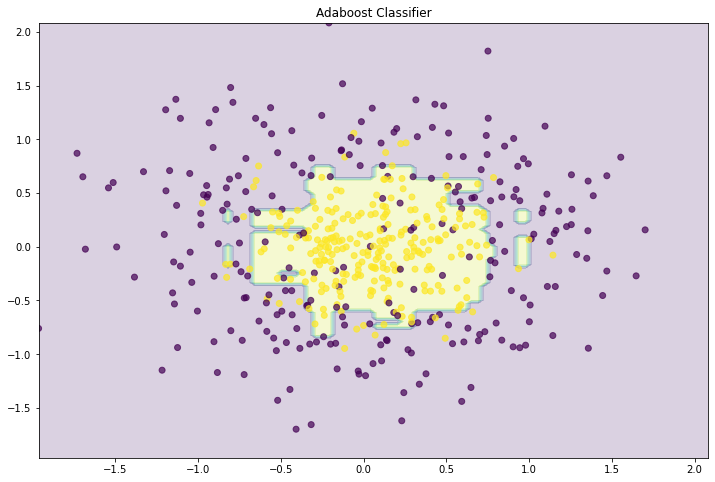

In [14]:
abc = AdaBoostClassifier(n_estimators=1500,learning_rate=0.1)
abc.fit(X,y)
plot_decision_boundary(abc)

In [15]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.832000 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}
